In [60]:
import os
import random
import time
from pathlib import Path

import cv2
import numpy as np 
from PIL import Image

import albumentations as A
import matplotlib.pyplot as plt

In [61]:
data_dir = Path("/data/a3-data/images/")
data_dir.exists()

True

In [62]:
images = list(data_dir.glob("**/*.jpg"))
len(images)

174341

/data/a3-data/images/footasylum/footasylum.124e99e28ccffe63d709ba91627e2c4e/0b2d995f703a971fa2328536001eb3ad.jpg


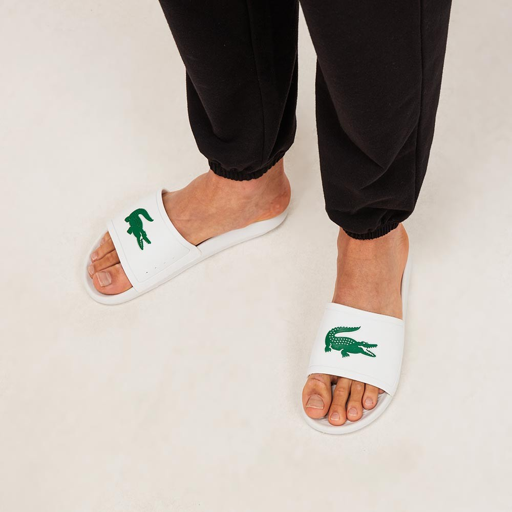

In [63]:
image = images[random.randint(0, len(images))]
print(image)
Image.open(image).resize((512, 512))

In [64]:
t0 = time.perf_counter()
img = cv2.imread(str(image), -1)
t1 = time.perf_counter()


if img.shape[-1] == 4:
    mask = img[:, :, 3] == 0
    img[mask] = [255] * 4

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
t2 = time.perf_counter()

print(img.shape)
print("time to load", t1 - t0)
print("time to convert", t2 - t1)


(900, 1000, 3)
time to load 0.006923701999767218
time to convert 0.001017190999846207


In [65]:
image_size = 512
transforms = A.Compose(
    [
        A.HorizontalFlip(p=1.0),
        A.ImageCompression(p=1.0, quality_lower=50, quality_upper=60),
        A.RandomBrightnessContrast(p=1.0, brightness_limit=0.1, contrast_limit=0.1),
        # A.ISONoise(p=1.0),
        # A.RandomResizedCrop(
        #     256, 256, scale=(0.5, 0.5), ratio=(1.0, 1.0), p=1.0, interpolation=3
        # ),
        A.SmallestMaxSize(image_size, interpolation=3),
        A.CenterCrop(image_size, image_size)
    ]
)


(512, 512, 3)
time to augment 0.01718016599988914


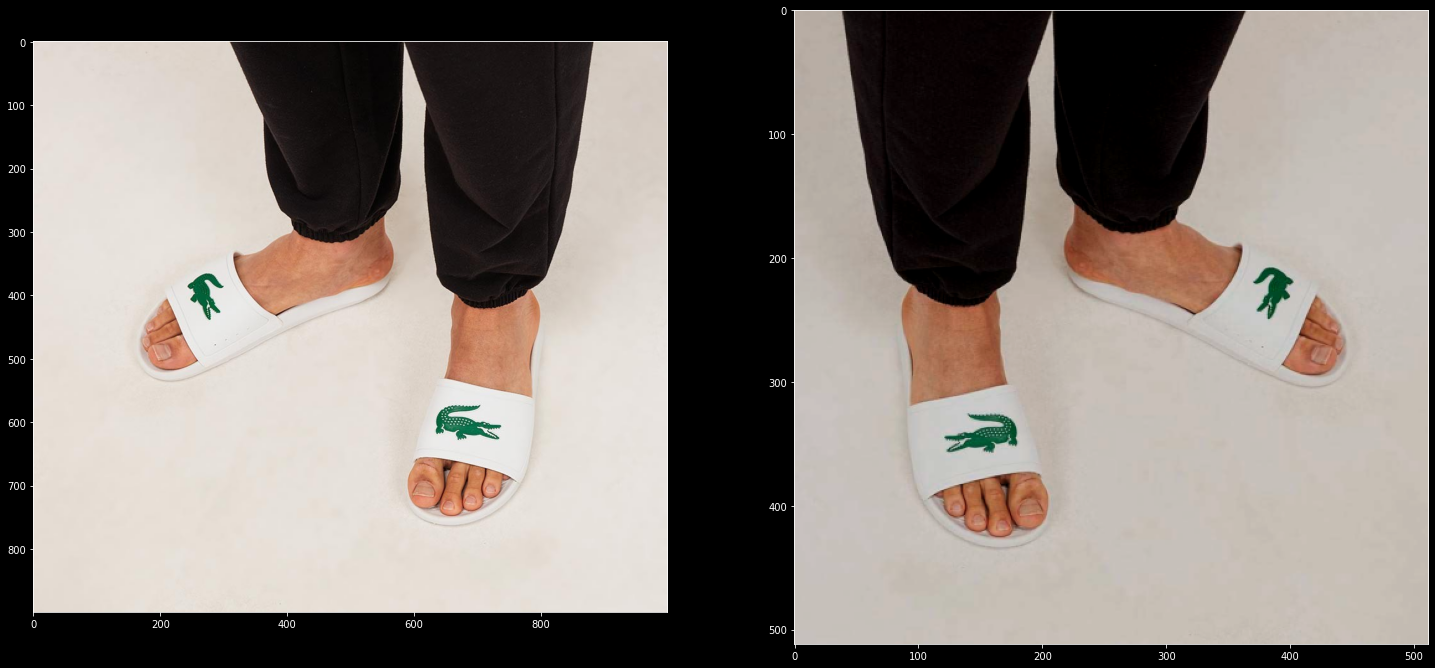

In [66]:
t3 = time.perf_counter()
aug_img = transforms(image=img)["image"]
t4 = time.perf_counter()
print(aug_img.shape)
print("time to augment", t4 - t3)

fig, axs = plt.subplots(1, 2, figsize=(25, 25))
axs[0].imshow(img)
axs[1].imshow(aug_img)

In [74]:
image_grid = list()
for j in range(5):
    image_row = list()
    for i in range(5):
        image_row.append(str(images[i+j]))
    image_grid.append(image_row)
image_grid


[['/data/a3-data/images/vrnts/vrnts.01884a42c7dd549f7d55aa58fe89ba30/65a4f672e5952ab91706cbf0aba93c92.jpg',
  '/data/a3-data/images/vrnts/vrnts.01884a42c7dd549f7d55aa58fe89ba30/7c52d77e87f831dde19fb7cfa9a4f2a4.jpg',
  '/data/a3-data/images/vrnts/vrnts.01884a42c7dd549f7d55aa58fe89ba30/3fbb0fe6f9ecbfb423120d4b596cd7ed.jpg',
  '/data/a3-data/images/vrnts/vrnts.6d4486f484430102eaa59586b88f7e0d/2bbbaffa5da5552abd80b55c5398861e.jpg',
  '/data/a3-data/images/vrnts/vrnts.6d4486f484430102eaa59586b88f7e0d/1ddc893669244c178ad5a207974f70e3.jpg'],
 ['/data/a3-data/images/vrnts/vrnts.01884a42c7dd549f7d55aa58fe89ba30/7c52d77e87f831dde19fb7cfa9a4f2a4.jpg',
  '/data/a3-data/images/vrnts/vrnts.01884a42c7dd549f7d55aa58fe89ba30/3fbb0fe6f9ecbfb423120d4b596cd7ed.jpg',
  '/data/a3-data/images/vrnts/vrnts.6d4486f484430102eaa59586b88f7e0d/2bbbaffa5da5552abd80b55c5398861e.jpg',
  '/data/a3-data/images/vrnts/vrnts.6d4486f484430102eaa59586b88f7e0d/1ddc893669244c178ad5a207974f70e3.jpg',
  '/data/a3-data/images/vrn

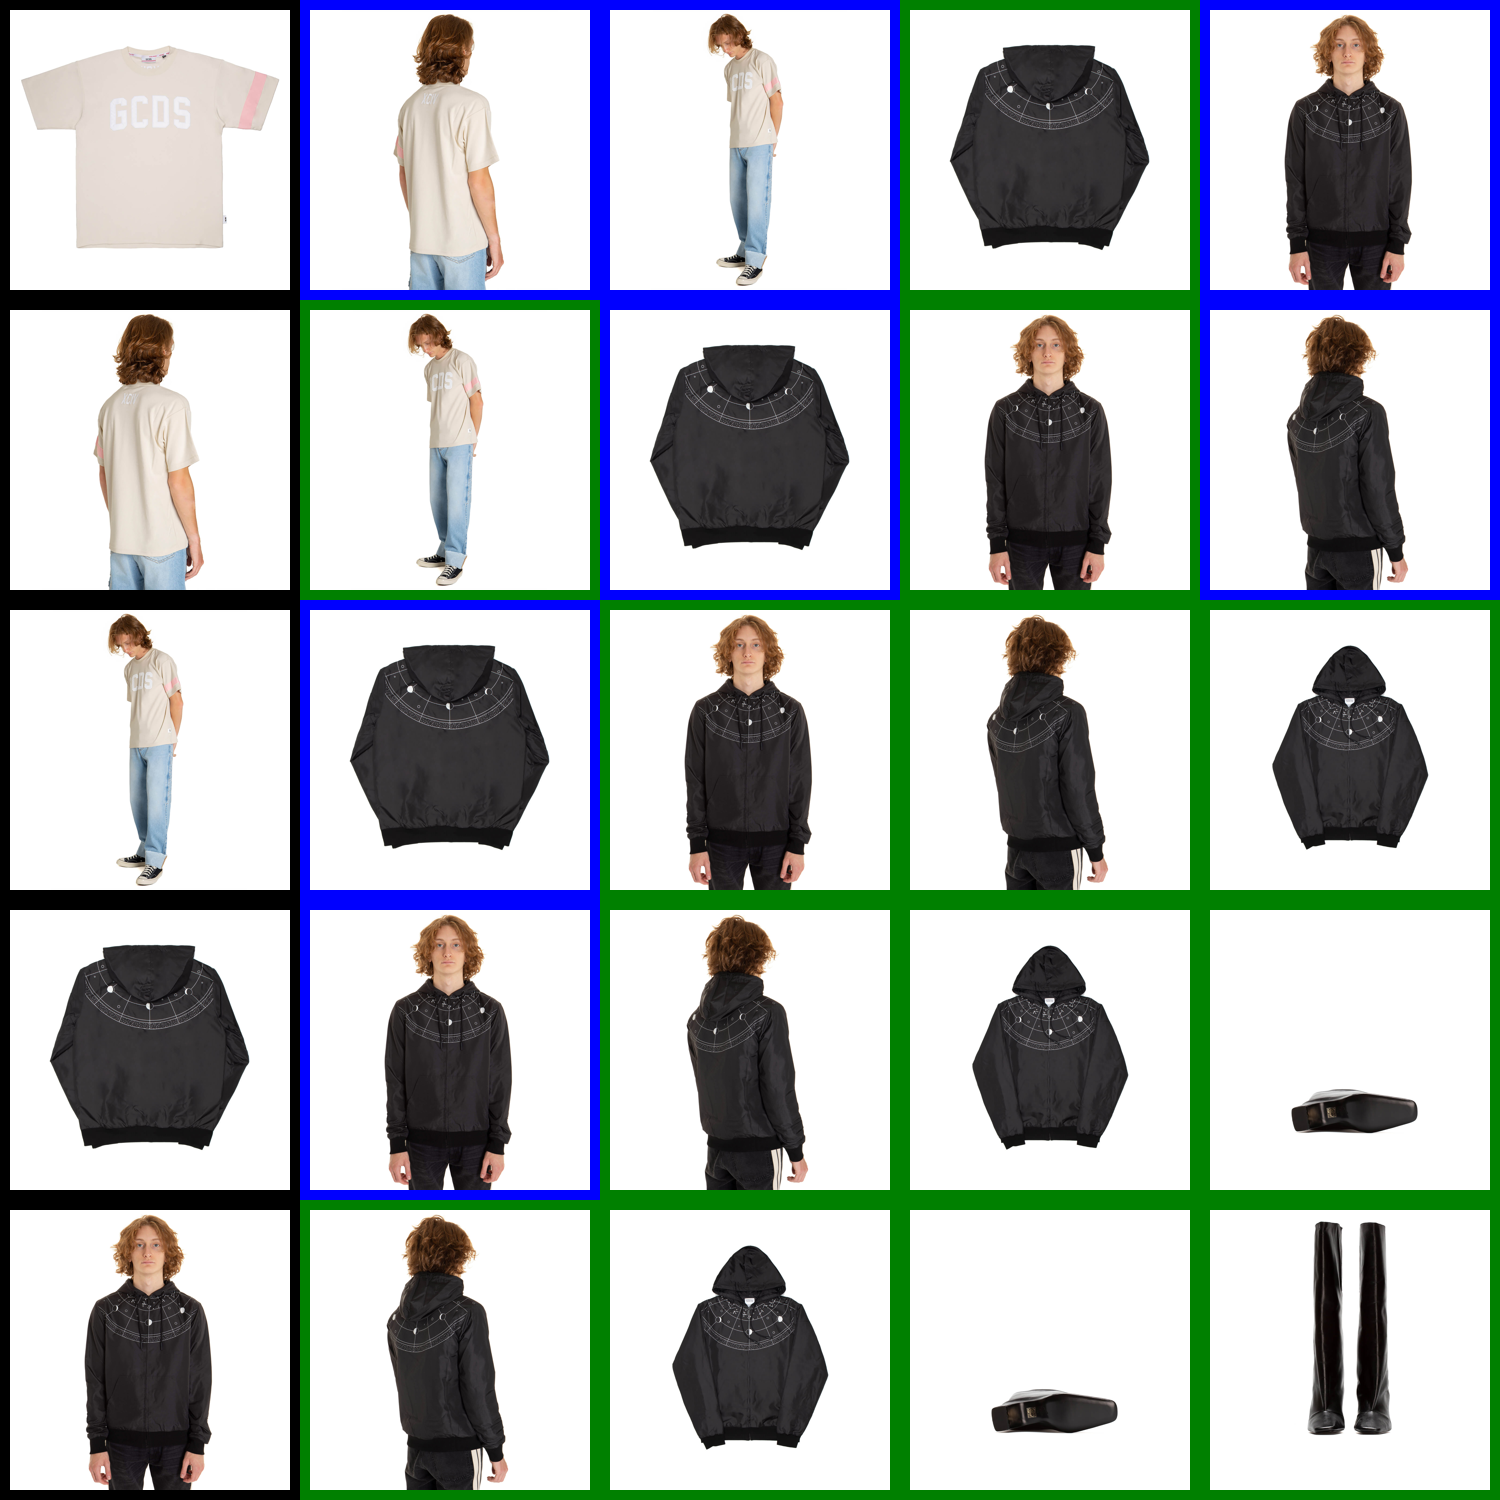

In [78]:
from typing import List
from PIL import ImageOps


def make_image_grid(image_grid: List[List[str]], image_size=300, targets=None):
    rows = len(image_grid)
    cols = len(image_grid[0])

    grid = Image.new("RGB", size=(cols * image_size, rows * image_size))
    grid_w, grid_h = grid.size

    border = "black"
    for i, row in enumerate(image_grid):
        for j, img in enumerate(row):
            offset_x, offset_y = i * image_size, j * image_size
            img = Image.open(img).resize((image_size - 20, image_size - 20))
            img = ImageOps.expand(
                img,
                border=10,
                fill="black"
                if i == 0
                else ("blue" if random.random() > 0.5 else "green"),
            )
            grid.paste(img, box=(offset_x, offset_y))
    return grid


grid = make_image_grid(image_grid)
grid
